<a href="https://colab.research.google.com/github/ThiagSampaio/teste_confitec/blob/master/TESTEPYSPARK_Confitec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste Confitec PySpark

O Teste gira em torno de um problema básico de ETL em torno do arquivo <b>OriginaisNetflix.parquet</b>, presente na mesma pasta deste arquivo.<br>

Foi escolhido a ferramenta <b>Google Colab</b> para realização deste desafio por sua visualização e simplicidade, porém de forma igualmente simples, poderíamos usar <b> Databricks</b>, <b> AWS EC2 PySpark </b>, <b> AWS EMR Cluster </b> ou até uma <b>Máquina linux local</b>.

A Resolução do problema está divido nos seguintes passos:
<ul>
  <li>1- Configuração do ambiente.</li>
  <li>2- Problema <b>número 1</b>.</li>
  <li>3- Problema <b>número 3</b>.</li>
  <li>4- Problema <b>número 4</b>.</li>
  <li>5- Problema <b>número 5</b>.</li>
  <li>6- Problema <b>número 6</b>.</li>
  <li>7- Problema <b>número 2*</b>.</li>
  <li>8- Problema <b>número 7</b>.</li>
  <li>9- Problema <b>número 8</b>.</li>
  <li>10- Problema <b>número 9</b>.</li>
  <li>11- Considerações finais</b>.</li>
</ul>

"*" O problema <b>número 2</b> foi deixado para o final, pois o pyspark utiliza processamento paralelo, fazendo com que o sort() pedido fosse "perdido"

# 1 - Configuração do ambiente
 



## 1.1 -Montando drive e localizando o arquivo.

O google Colab não passa de uma VM com notebook instalado. Quando entramos em uma sessão geralmente estamos em uma pasta geral, como mostrado abaixo:

```comand-line
!ls
````
Saída :


In [1]:
!ls

sample_data


Vamos então conectar o seu drive na VM. Para isso basta clicar em arquivos (simbolo de pasta do lado esquerdo da tela) depois clicar em <b>montar drive</b>.<br>

Depois do drive montado, a saída do comando `!ls` deve aparecer como abaixo:

In [3]:
!ls

drive  sample_data


Feito isso, agora devemos jogar o arquivo <b>OriginaisNetflix.parquet</b> no drive. Existem <b>n</b> formas de fazer. Aqui criei uma pasta no meu drive chamada <b>teste_tecnico_confitec</b> e fiz o upload do arquivo. O leitor pode fazer de outra forma , atentando-se apenas em passar o caminho correto no comando a seguir.<br>
Vamos levar nossa VM até o local no qual o arquivo está:



In [4]:
cd drive/MyDrive/teste_tecnico_confitec

/content/drive/MyDrive/teste_tecnico_confitec


In [5]:
!ls

OriginaisNetflix.parquet


Note que estamos no local correto e podemos passar para próxima subetapa.


## 1.2 - Instalação de pacotes / carregamento do arquivo / Configuração para Comun. AWS

- Vamos instalar o pacote pyspark e o pacote boto3(AWS).
- Importar as libs usadas.
- Configurar e testar a comunicação com s3 bucket.
- Carregar o arquivo <b>.parquet</b> para uma variável.

In [6]:
# Instalação de pacotes
!pip install pyspark
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=79a2b620fb76478051b87fe384c3f5c527c27919b9689dda774edc8fa2ed81ee
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 51.2 MB/s eta 0:00:00


In [7]:
# Importanto Libs
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import boto3

In [8]:
#Configurar e testar a comunicação com s3 bucket
s3 = boto3.client(
    "s3",
    aws_access_key_id="xxxx",
    aws_secret_access_key="xxxx",
)
s3.list_buckets()

{'ResponseMetadata': {'RequestId': 'ES0TD2M2YM89CEPA',
  'HostId': 'dZzs3mBLvqPRoL78mrlAzCzPZO+Kgr/MuW29bvFSn+ilx/FIHg8xEH7ZZO2s4bRID4UATHeTLZQ=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'dZzs3mBLvqPRoL78mrlAzCzPZO+Kgr/MuW29bvFSn+ilx/FIHg8xEH7ZZO2s4bRID4UATHeTLZQ=',
   'x-amz-request-id': 'ES0TD2M2YM89CEPA',
   'date': 'Thu, 20 Apr 2023 16:23:33 GMT',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'Buckets': [{'Name': 'testeconfitec',
   'CreationDate': datetime.datetime(2023, 4, 19, 23, 25, 22, tzinfo=tzlocal())}],
 'Owner': {'DisplayName': 'thiagosampaioparticular',
  'ID': 'f05bb84dc6715bd0e603eecb62aebb767d68ab956fc04fa8f2c48caa1d48352b'}}

Podemos notar que a comunicação foi um sucesso, listando o bucket <b>  testeconfitec </b> como presente.

In [9]:
#Carregar o arquivo .parquet para uma variável.
spark = SparkSession.builder.appName("Confitec").getOrCreate()
df = spark.read.parquet("OriginaisNetflix.parquet")
df.show()

+--------------------+--------------------+--------------------+---------+--------------------+-------------+--------------+-----------+---------+---------+----------+------+-----+--------+--------------------+
|               Title|               Genre|         GenreLabels| Premiere|             Seasons|SeasonsParsed|EpisodesParsed|     Length|MinLength|MaxLength|    Status|Active|Table|Language|         dt_inclusao|
+--------------------+--------------------+--------------------+---------+--------------------+-------------+--------------+-----------+---------+---------+----------+------+-----+--------+--------------------+
|      House of Cards|     Political drama|     political,drama| 1-Feb-13|6 seasons, 73 epi...|            6|            73| 42–59 min.|       42|       59|     Ended|     0|Drama| English|2021-03-16T21:20:...|
|       Hemlock Grove|     Horror/thriller|     horror,thriller|19-Apr-13|3 seasons, 33 epi...|            3|            33| 45–58 min.|       45|       58|

<b>Chegamos ao fim da etapa de configuração.</b>

# 2 - Problema número 1. 

1- Transformar os campos `Premiere` e `dt_inclusao` de string para datetime.

Vamos separar o problema em 3 partes:

- Ver se as colunas referidas estão como StringType()
- Caso sim: Transformar a coluna `Premiere` e `dt_inclusao` para datetime.
- Olhar de forma visual se está ok.
- Olhar novamente se foi trocado os tipos.

In [10]:
# Ver se as colunas referidas estão como StringType()
for field in df.schema.fields:
  print(field.name + " , " + str(field.dataType))

Title , StringType()
Genre , StringType()
GenreLabels , StringType()
Premiere , StringType()
Seasons , StringType()
SeasonsParsed , LongType()
EpisodesParsed , LongType()
Length , StringType()
MinLength , LongType()
MaxLength , LongType()
Status , StringType()
Active , LongType()
Table , StringType()
Language , StringType()
dt_inclusao , StringType()


As duas colunas estão como StringType()

In [12]:
#Caso sim: Transformar a coluna Premiere e dt_inclusao para datetime.
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")
df = df.withColumn("Premiere",to_timestamp("Premiere","dd-MMM-yy"))
df = df.withColumn("dt_inclusao",date_format("dt_inclusao","yyyy-MM-dd HH:mm:ss"))
df = df.withColumn("dt_inclusao",to_timestamp("dt_inclusao","yyyy-MM-dd HH:mm:ss"))

In [13]:
df.show()

+--------------------+--------------------+--------------------+-------------------+--------------------+-------------+--------------+-----------+---------+---------+----------+------+-----+--------+-------------------+
|               Title|               Genre|         GenreLabels|           Premiere|             Seasons|SeasonsParsed|EpisodesParsed|     Length|MinLength|MaxLength|    Status|Active|Table|Language|        dt_inclusao|
+--------------------+--------------------+--------------------+-------------------+--------------------+-------------+--------------+-----------+---------+---------+----------+------+-----+--------+-------------------+
|      House of Cards|     Political drama|     political,drama|2013-02-01 00:00:00|6 seasons, 73 epi...|            6|            73| 42–59 min.|       42|       59|     Ended|     0|Drama| English|2021-03-17 00:20:24|
|       Hemlock Grove|     Horror/thriller|     horror,thriller|2013-04-19 00:00:00|3 seasons, 33 epi...|            3| 

Note que precisamos utilizar um tratamento prévio para `dt_inclusao` pois estava no formato `ISO8061`, não perdendo a informação de timezone.

In [14]:
#Olhar novamente se foi trocado os tipos.
for field in df.schema.fields:
  print(field.name + " , " + str(field.dataType))

Title , StringType()
Genre , StringType()
GenreLabels , StringType()
Premiere , TimestampType()
Seasons , StringType()
SeasonsParsed , LongType()
EpisodesParsed , LongType()
Length , StringType()
MinLength , LongType()
MaxLength , LongType()
Status , StringType()
Active , LongType()
Table , StringType()
Language , StringType()
dt_inclusao , TimestampType()


 Podemos notar que foi trocado o tipo como pedido

 <b> FIM DO PROBLEMA 1. <b>

# 3 - Problema número 3. 

3- Remover linhas duplicadas e trocar o resultado das linhas que tiverem a coluna "Seasons" de "TBA" para "a ser anunciado"

Vamos separar o problema em  partes:

- Ver se temos linhas duplicadas.
- Trocar "TBA" para a "a ser anunciado" 



In [15]:
#Ver se temos linhas duplicadas.
if df.count() > df.dropDuplicates(["Title"]).count():
    raise ValueError('Data has duplicates')

Podemos notar que não tivemos nenhum alerta, ou seja, não temos linhas duplicadas.

In [17]:
#Trocar "TBA" para a "a ser anunciado"
df = df.withColumn("Seasons", when(df.Seasons == "TBA","a ser anunciado").otherwise(df.Seasons))


 <b> FIM DO PROBLEMA 3. <b>

# 4 - Problema número 4. 

4 - Criar uma coluna nova chamada `Data de Alteração` e dentro dela um timestamp.

Vamos separar o problema em  partes:

- Criar a nova coluna com timestamp.
- Olhar visualmente se houve a alteração 

In [18]:
df = df.withColumn("Data de Alteração", current_timestamp())
df.show()

+--------------------+--------------------+--------------------+-------------------+--------------------+-------------+--------------+-----------+---------+---------+----------+------+-----+--------+-------------------+--------------------+
|               Title|               Genre|         GenreLabels|           Premiere|             Seasons|SeasonsParsed|EpisodesParsed|     Length|MinLength|MaxLength|    Status|Active|Table|Language|        dt_inclusao|   Data de Alteração|
+--------------------+--------------------+--------------------+-------------------+--------------------+-------------+--------------+-----------+---------+---------+----------+------+-----+--------+-------------------+--------------------+
|      House of Cards|     Political drama|     political,drama|2013-02-01 00:00:00|6 seasons, 73 epi...|            6|            73| 42–59 min.|       42|       59|     Ended|     0|Drama| English|2021-03-17 00:20:24|2023-04-20 16:52:...|
|       Hemlock Grove|     Horror/th

 <b> FIM DO PROBLEMA 4. <b>

# 5 - Problema número 5. 

5 - Trocar os nomes das colunas de inglês para português.

Vamos separar o problema em 2 partes:

- Criar um dicionário, com as traduções e mudar na tabela
- Olhar visualmente se houve a alteração 

In [20]:
# Criar um dicionário, com as traduções e mudar na tabela
lookup= {"Title":"Título", "Genre": "Gênero", "GenreLabels": "Rótulos Gênero", "Premiere": "Estreia", "Seasons":"Temporadas",
         "SeasonsParsed":"TotalTemporadas",  "EpisodesParsed":"TotalEpisódios","Length":"Duração", "MinLength":"DuraçãoMínima",
         "MaxLength":"DuraçãoMáxima", "Status":"Status", "Active":"Ativo", "Table":"Faixa Etária", "Language":"Idioma", "dt_inclusao":"dt_inclusao"}
df = df.select([col(c).alias(lookup.get(c, c)) for c in df.columns])         

In [21]:
#Olhar visualmente se houve a alteração
df.show()

+--------------------+--------------------+--------------------+-------------------+--------------------+---------------+--------------+-----------+-------------+-------------+----------+-----+------------+-------+-------------------+--------------------+
|              Título|              Gênero|      Rótulos Gênero|            Estreia|          Temporadas|TotalTemporadas|TotalEpisódios|    Duração|DuraçãoMínima|DuraçãoMáxima|    Status|Ativo|Faixa Etária| Idioma|        dt_inclusao|   Data de Alteração|
+--------------------+--------------------+--------------------+-------------------+--------------------+---------------+--------------+-----------+-------------+-------------+----------+-----+------------+-------+-------------------+--------------------+
|      House of Cards|     Political drama|     political,drama|2013-02-01 00:00:00|6 seasons, 73 epi...|              6|            73| 42–59 min.|           42|           59|     Ended|    0|       Drama|English|2021-03-17 00:20:2

 <b> FIM DO PROBLEMA 5. <b>

# 6 - Problema número 2. 

2 - Ordenar os dados por ativos e gênero de forma descrescente, 0 = inativo e 1 = ativo, todos com número 1 devem apararecer primeiro

Vamos separar o problema em uma parte:

- Ordenar como pedido e olhar se está ok.

*Este problema foi jogado para final devido ao processamento paralelo.

In [23]:
#Ordenar como pedido e olhar se está ok.
df = df.orderBy(col("Ativo").desc(),col("Gênero").desc())
df.show()

+--------------------+--------------------+--------------------+-------------------+--------------------+---------------+--------------+----------+-------------+-------------+-------+-----+------------+-------+-------------------+--------------------+
|              Título|              Gênero|      Rótulos Gênero|            Estreia|          Temporadas|TotalTemporadas|TotalEpisódios|   Duração|DuraçãoMínima|DuraçãoMáxima| Status|Ativo|Faixa Etária| Idioma|        dt_inclusao|   Data de Alteração|
+--------------------+--------------------+--------------------+-------------------+--------------------+---------------+--------------+----------+-------------+-------------+-------+-----+------------+-------+-------------------+--------------------+
|Dance & Sing with...|chrildrens musica...|chrildrens,musica...|2018-05-18 00:00:00|1 season, 11 epis...|              1|            11|    2 min.|            2|            2|Pending|    1|    Children|English|2021-03-17 00:20:24|2023-04-20 17:

 <b> FIM DO PROBLEMA 2. <b>

# 7 - Problema número 6. 

6 - Testar e verificar se algum erro de processamento do spark e indentificar onde pode ter ocorrido o erro.

Resposta: Podemos notar que se fizermos o problema de número 2 antes das outras mudanças, devido a característica o spark(paralelo), não veríamos a mudança de sort() realizada. Porém esse erro já fora tratado.

<b> FIM DO PROBLEMA 6 </b>


# 8 - Problema número 7. 

7 - Criar apenas 1 `.csv` com seguintes colunas que foram nomeadas anteriormente "Title, Genre, Seasons, Premiere, Language, Active, Status, dt_inclusao, Data de Alteraçao" as colunas devem estar em português com header e separadas por `;`.


Vamos separar o problema em 3 parte:

- Criar uma nova variável com a colunas pedidas
- Transformar o df para arquivo `.csv` e salvar na pasta do problema.
- Subir o arquivo para o bucket


In [25]:
#Criar uma nova variável com a colunas pedidas.
df2 = df.select('Título', 'Gênero', 'Estreia', 'Idioma', 'Ativo', 'Status', 'dt_inclusao', 'Data de Alteração')
df2.show()

+--------------------+--------------------+-------------------+-------+-----+-------+-------------------+--------------------+
|              Título|              Gênero|            Estreia| Idioma|Ativo| Status|        dt_inclusao|   Data de Alteração|
+--------------------+--------------------+-------------------+-------+-----+-------+-------------------+--------------------+
|Dance & Sing with...|chrildrens musica...|2018-05-18 00:00:00|English|    1|Pending|2021-03-17 00:20:24|2023-04-20 17:40:...|
|Super Monsters Mo...|chrildrens musica...|2018-09-14 00:00:00|English|    1|Pending|2021-03-17 00:20:24|2023-04-20 17:40:...|
|          True Tunes|chrildrens musica...|2019-07-12 00:00:00|English|    1|Pending|2021-03-17 00:20:24|2023-04-20 17:40:...|
|      Super Monsters| childrens-animation|2017-10-13 00:00:00|English|    1|Renewed|2021-03-17 00:20:24|2023-04-20 17:40:...|
|Charlie's Colorfo...| childrens-animation|2019-03-22 00:00:00|English|    1|Pending|2021-03-17 00:20:24|2023-0

In [26]:
#Transformar o df2 para arquivo.csv e salvar na pasta do problema
df2.toPandas().to_csv("resultfinalconfitec.csv",sep=";",index=False)
!ls

OriginaisNetflix.parquet  resultfinalconfitec.csv


In [27]:
#Subir o arquivo para o bucket
s3.upload_file("resultfinalconfitec.csv","testeconfitec","resultfinalconfitec.csv")

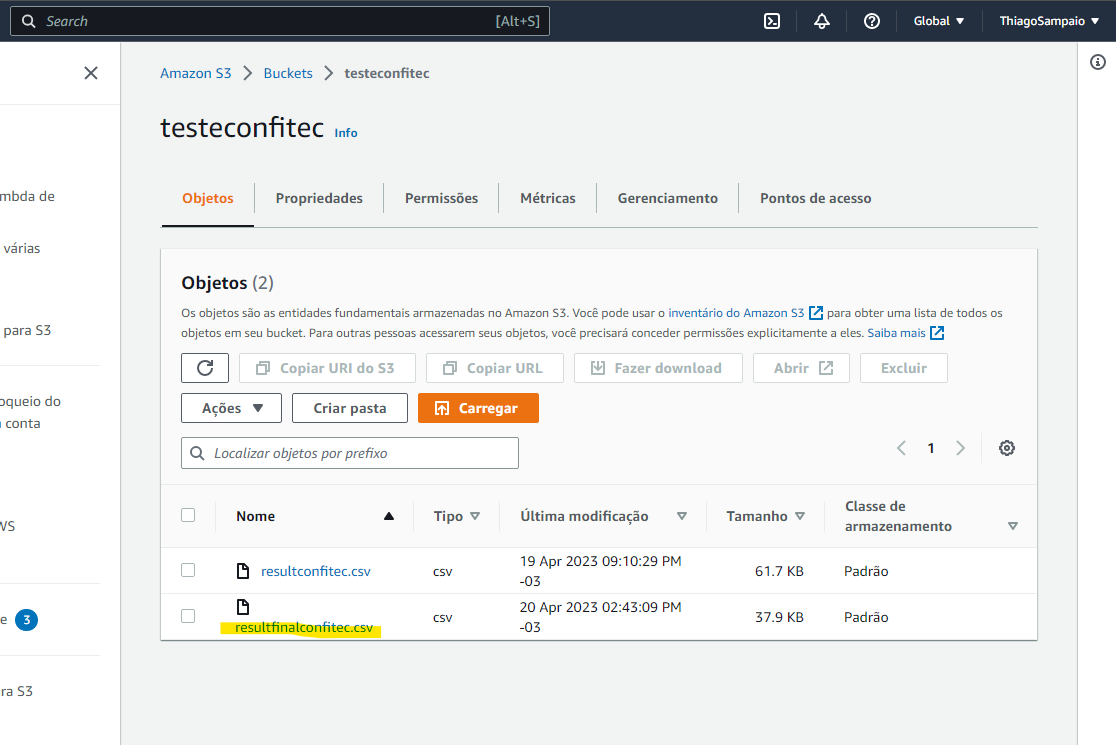

In [31]:
from IPython.display import Image
Image("Captura de tela 2023-04-20 144543.png")

# Fim do desafio.

Obs: Para segurança do bucket , a chave descrita não é a utilizada.